### Pandas Cheat Sheet Notebook
A jupyter notebook showing some of the functionality of pandas using this cheat sheet as a guide: https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf  
All commands are run on/with the iris dataset named `df`

### Outline
- <a href='#Syntax - Creating DataFrames'>Syntax - Creating DataFrames</a>
- <a href='#Summarize Data'>Summarize Data</a>  
    - <a href='#Summary Functions'>Summary Functions</a>
- <a href='#Plotting'>Plotting</a>
- <a href='#Subsetting'>Subsetting</a>
    - <a href='#Subset Observations (Rows)'>Subset Observations (Rows)</a>
    - <a href='#Subset Variables (Columns)'>Subset Variables (Columns)</a>
- <a href='#Reshaping'>Reshaping</a>
- <a href='#MethodChaining'>Method Chaining</a>
- <a href='#Logic'>Logical Comparators</a>
- <a href='#MakeNewColumns'>Make New Columns</a>
- <a href='#GroupData'>Group Data</a>
- <a href='#HandlingMissingData'>Handling Missing Data</a>
- <a href='#CombineDataSets'>Combining Data Sets</a>
- <a href='#Windows'>Windows</a>

In [1]:
import pandas as pd
print('pandas version: ', pd.__version__)
%matplotlib inline
dfOriginal = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
df = dfOriginal.copy()

pandas version:  0.25.1


<a id='Syntax - Creating DataFrames'></a>
## Syntax - Creating DataFrames

In [2]:
# Specify values for each column.
creatingDF1 = pd.DataFrame(
    {
        "a": [4, 5, 6],
        "b": [7, 8, 9],
        "c": [10, 11, 12]
    },
    index = [1, 2, 3]
)
creatingDF1

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [3]:
# Specify values for each row.
creatingDF2 = pd.DataFrame(
    [
        [4, 7, 10],
        [5, 8, 11],
        [6, 9, 12]
    ],
    index = [1, 2, 3],
    columns = ['a', 'b', 'c']
)
creatingDF2

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [4]:
# Create DataFrame with a MultiIndex
creatingDF3 = pd.DataFrame(
    {
        "a": [4, 5, 6],
        "b": [7, 8, 9],
        "c": [10, 11, 12]
    },
    index = pd.MultiIndex.from_tuples(
        [['d', 1], ['d', 2], ['e', 2]], names = ['n', 'v']
    )
)
creatingDF3

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

<a id='Summarize Data'></a>
## Summarize Data

In [5]:
# Count number of rows with each unique value of variable
valueCounts = df.sepal_length.value_counts()
valueCounts.head(3)

5.0    10
6.3     9
5.1     9
Name: sepal_length, dtype: int64

In [6]:
# Number of rows in DataFrame
len(df)

150

In [7]:
# Number of distinct values in a column
df.sepal_length.nunique()

35

In [8]:
# Basic descriptive statistics for each column (or GroupBy)
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<a id='Summary Functions'></a>
#### Summary Functions

Pandas provides a large set of __summary functions__ that operate on different kins of panas objects (DataFrame columns, Series, GroupBy, Expanding and Rolling (see below)) and produce single values for each of the groups. When applied to a DataFrame, the result is returned as a pandas Series for each column

In [9]:
# Sum values of each object.
df.sum()

sepal_length                                                876.5
sepal_width                                                 458.6
petal_length                                                563.7
petal_width                                                 179.9
species         setosasetosasetosasetosasetosasetosasetosaseto...
dtype: object

In [10]:
# Similar to sum (above), but different statistical measures
df.median()
df.min()
df.max()
df.mean()
df.var()
df.std()

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

In [11]:
# Count non-NA/null values of each object.
df.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [12]:
# Quantiles of each object.
df.quantile([0.05, 0.25, 0.75, 0.95])

,sepal_length,sepal_width,petal_length,petal_width
0.05,4.600,2.345,1.3,0.2
0.25,5.100,2.800,1.6,0.3
0.75,6.400,3.300,5.1,1.8
0.95,7.255,3.800,6.1,2.3


In [13]:
# Apply function to each object
# _note (not on cheat sheet): The apply function is much more powerful than simply_
#     a summary function... it allows for the vectorization of functions across 
#     rows, columns or values_

# basic syntax
#df.apply(<insert_function_of_choice>)

<a id='Plotting'></a>
## Plotting

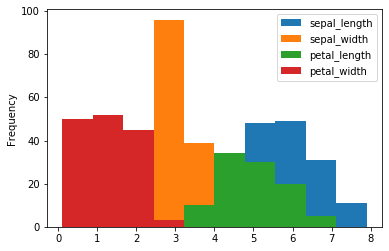

In [14]:
# Histogram for each column
df.plot.hist()

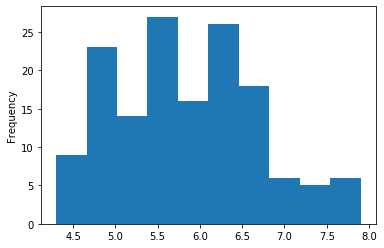

In [15]:
# Histogram works on series as well (here's a column)
df.sepal_length.plot.hist()

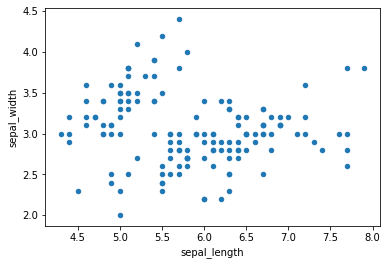

In [16]:
# Scatter chart using pairs of points
df.plot.scatter(x='sepal_length', y='sepal_width')

<a id='Subsetting'></a>
## Subsetting

<a id='Subset Observations (Rows)'></a>
#### Subset Observations (Rows)

In [17]:
# Extract rows that meet logical criteria.
dfSubset1 = df[df.sepal_length > 6]

In [18]:
# Remove duplicate rows (only considers columns).
dfSubset2 = df.drop_duplicates()
print('len(df): ', len(df), '; len(dfSubset2): ', len(dfSubset2))

len(df):  150 ; len(dfSubset2):  149


In [19]:
# Select first n rows.
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [20]:
# Select last n rows.
df.tail(2)

,sepal_length,sepal_width,petal_length,petal_width,species
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [21]:
# Randomly select fraction of rows.
len(df.sample(frac=0.5))

75

In [22]:
# Randomly select n rows.
len(df.sample(n=10))

10

In [23]:
# Select rows by position.
df.iloc[10:11]

,sepal_length,sepal_width,petal_length,petal_width,species
10,5.4,3.7,1.5,0.2,setosa


In [24]:
# Select and order ton n entries.
df.nlargest(3, 'sepal_length')

,sepal_length,sepal_width,petal_length,petal_width,species
131,7.9,3.8,6.4,2.0,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica


In [25]:
df.nsmallest(3, 'sepal_length')

,sepal_length,sepal_width,petal_length,petal_width,species
13,4.3,3.0,1.1,0.1,setosa
8,4.4,2.9,1.4,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa


<a id='Subset Variables (Columns)'></a>
#### Subset Variables (Columns)

In [26]:
# Select multiple columns with specific names.
dfSubsetCols = df[['sepal_length', 'sepal_width']]
dfSubsetCols.head(2)

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0


In [27]:
# Select single column with specific name.
dfSubsetSingleCol = df['sepal_length']
dfSubsetSingleCol2 = df.sepal_length
dfSubsetSingleCol.head(2)

0    5.1
1    4.9
Name: sepal_length, dtype: float64

In [28]:
# Select columns whose name matches regular expression _regex_.
df.filter(regex='length$').head(2)

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4


In [29]:
# Select all columns between columnNameA and columnNameB (inclusive).
df.loc[:, 'sepal_width':'petal_width'].head(2)

,sepal_width,petal_length,petal_width
0,3.5,1.4,0.2
1,3.0,1.4,0.2


In [30]:
# Select columns in positions 1 and 3 (first column is 0)
df.iloc[:, [1,3]].head(2)

,sepal_width,petal_width
0,3.5,0.2
1,3.0,0.2


In [31]:
# Select rows meeting logical condition, and only the specific columns
df.loc[df.sepal_length > 7.4, ['species']]

,species
105,virginica
117,virginica
118,virginica
122,virginica
131,virginica
135,virginica


<a id='Reshaping'></a>
## Reshaping

In [32]:
# Gather columns into rows.
dfMelted = pd.melt(df)
dfMelted

,variable,value
0,sepal_length,5.1
1,sepal_length,4.9
2,sepal_length,4.7
3,sepal_length,4.6
4,sepal_length,5
...,...,...
745,species,virginica
746,species,virginica
747,species,virginica
748,species,virginica


In [33]:
# Spread rows into columns.
dfMelted.pivot(columns='variable', values='value')

variable,petal_length,petal_width,sepal_length,sepal_width,species
0,NaN,NaN,5.1,NaN,NaN
1,NaN,NaN,4.9,NaN,NaN
2,NaN,NaN,4.7,NaN,NaN
3,NaN,NaN,4.6,NaN,NaN
4,NaN,NaN,5,NaN,NaN
...,...,...,...,...,...
745,NaN,NaN,NaN,NaN,virginica
746,NaN,NaN,NaN,NaN,virginica
747,NaN,NaN,NaN,NaN,virginica
748,NaN,NaN,NaN,NaN,virginica


In [34]:
# Append rows of DataFrames.
df1 = df.head(2)
df2 = df.tail(2)
dfCombined = pd.concat([df1, df2])
dfCombined

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [35]:
# Append columns of DataFrames.
df1 = df.sepal_length
df2 = df.sepal_width
dfCombined = pd.concat([df1, df2], axis=1)
dfCombined.head(3)

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2


In [36]:
# Order rows by values of a column.
# (low to high):
print(df.sort_values('sepal_length').head(3))
# (hight to low):
print(df.sort_values('sepal_length', ascending=False).head(3))

    sepal_length  sepal_width  petal_length  petal_width species
13           4.3          3.0           1.1          0.1  setosa
42           4.4          3.2           1.3          0.2  setosa
38           4.4          3.0           1.3          0.2  setosa
     sepal_length  sepal_width  petal_length  petal_width    species
131           7.9          3.8           6.4          2.0  virginica
135           7.7          3.0           6.1          2.3  virginica
122           7.7          2.8           6.7          2.0  virginica


In [37]:
# Rename the columns of a DataFrame
df.rename(columns = {'sepal_length': 'petalHolderSize'}).head(3)

,petalHolderSize,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [38]:
# Sort the index of a DataFrame
dfMixedUp = df.sort_values('sepal_length')
print(dfMixedUp.head(3))
print(dfMixedUp.sort_index().head(3))

    sepal_length  sepal_width  petal_length  petal_width species
13           4.3          3.0           1.1          0.1  setosa
42           4.4          3.2           1.3          0.2  setosa
38           4.4          3.0           1.3          0.2  setosa
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa


In [39]:
# Reset index of DataFrame to row numbers, moving index to columns.
dfMixedUp = df.sort_values('sepal_length')
print(dfMixedUp.head(3))
print(dfMixedUp.reset_index().head(3))

    sepal_length  sepal_width  petal_length  petal_width species
13           4.3          3.0           1.1          0.1  setosa
42           4.4          3.2           1.3          0.2  setosa
38           4.4          3.0           1.3          0.2  setosa
   index  sepal_length  sepal_width  petal_length  petal_width species
0     13           4.3          3.0           1.1          0.1  setosa
1     42           4.4          3.2           1.3          0.2  setosa
2     38           4.4          3.0           1.3          0.2  setosa


In [40]:
# Drop columns from DataFrame.
df.drop(columns=['sepal_width']).head(3)

,sepal_length,petal_length,petal_width,species
0,5.1,1.4,0.2,setosa
1,4.9,1.4,0.2,setosa
2,4.7,1.3,0.2,setosa


<a id='MethodChaining'></a>
## Method Chaining

In [41]:
# Most pandas methods return a DataFrame so that another pandas method can be applied to the result.
# This improves readability of code
(
    pd.melt(df)
    .rename(columns={
        'variable': 'var',
        'value': 'val'})
    .head(3)
)

,var,val
0,sepal_length,5.1
1,sepal_length,4.9
2,sepal_length,4.7


<a id='Logic'></a>
## Logical Comparators
#### pandas logical comparatros are similar to python escept for the following

In [42]:
# Group membership
df.isin(['setosa', 1.4]).head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,True,False,True
1,False,False,True,False,True
2,False,False,False,False,True


In [43]:
# Is NaN
pd.isnull(df).head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False


In [44]:
# Is not NaN
pd.notnull(df).head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True


In [45]:
# If any element is true
df.any()

sepal_length    True
sepal_width     True
petal_length    True
petal_width     True
species         True
dtype: bool

In [46]:
# If all elements are true
df.all()

sepal_length    True
sepal_width     True
petal_length    True
petal_width     True
species         True
dtype: bool

<a id='MakeNewColumns'></a>
## Make New Columns

In [47]:
# Compute and append one or more new columns.
df.assign(petalArea=lambda df: df.petal_width*df.petal_length).head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,petalArea
0,5.1,3.5,1.4,0.2,setosa,0.28
1,4.9,3.0,1.4,0.2,setosa,0.28
2,4.7,3.2,1.3,0.2,setosa,0.26


In [48]:
# Add single column.
df['petalArea2'] = df.petal_width * df.petal_length
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,petalArea2
0,5.1,3.5,1.4,0.2,setosa,0.28
1,4.9,3.0,1.4,0.2,setosa,0.28
2,4.7,3.2,1.3,0.2,setosa,0.26


In [49]:
# Bin columns into n buckets
# The actual binning...
df['sepal_length_quantile'] = pd.qcut(df.sepal_length, 10, labels=False)
# printing a shuffled df so you can see how it works
df[['sepal_length', 'sepal_length_quantile']].sample(frac=1).head(5)

,sepal_length,sepal_length_quantile
140,6.7,8
97,6.2,6
78,6.0,5
10,5.4,3
28,5.2,2


In [50]:
# Element-wise max
df.max(axis=1)

0       5.10
1       4.90
2       4.70
3       4.60
4       5.00
       ...  
145    11.96
146     9.50
147    10.40
148    12.42
149     9.18
Length: 150, dtype: float64

In [51]:
# column wise max
df.max()

sepal_length                   7.9
sepal_width                    4.4
petal_length                   6.9
petal_width                    2.5
species                  virginica
petalArea2                   15.87
sepal_length_quantile            9
dtype: object

In [52]:
# Trim values at input thresholds
df['trimmed_sepal_length'] = df.sepal_length.clip(lower=5.3, upper=5.8)
df[['sepal_length', 'trimmed_sepal_length']].sample(frac=1).head(6)

,sepal_length,trimmed_sepal_length
92,5.8,5.8
69,5.6,5.6
56,6.3,5.8
54,6.5,5.8
4,5.0,5.3
77,6.7,5.8


<a id='GroupData'></a>
## Group Data

In [53]:
# Get fresh copy
df = dfOriginal.copy()

In [54]:
# Overview of groupby...
# 1. Split the df into groups with `df.groupby(<by="colName" or level="index")` (this returns a "gropby object")
# 2. Apply a transformation to this gropby object:
#                   (shift, rank, cumsum, cimmax, cummin, cumprod, size or the generic `agg(function)`)

In [55]:
# Show that groupby just returns a "groupby object"
df.groupby(by="species")

In [56]:
# Show some of the transormations
groupedBySpecies = df.groupby(by="species")
print('size: ', groupedBySpecies.size())
print('\nmin: ', groupedBySpecies.min())
print('\nmax: ', groupedBySpecies.max())
print('\nsum: ', groupedBySpecies.sum())

size:  species
setosa        50
versicolor    50
virginica     50
dtype: int64

min:              sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa               4.3          2.3           1.0          0.1
versicolor           4.9          2.0           3.0          1.0
virginica            4.9          2.2           4.5          1.4

max:              sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa               5.8          4.4           1.9          0.6
versicolor           7.0          3.4           5.1          1.8
virginica            7.9          3.8           6.9          2.5

sum:              sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             250.3        171.4          73.1         12.3
versicolor         296.8        138.5         213.0    

In [57]:
# The rank transformation does a sort within each group
print('\nrank: ', groupedBySpecies.sepal_length.rank(pct=True))


rank:  0      0.65
1      0.37
2      0.21
3      0.15
4      0.49
       ... 
145    0.62
146    0.33
147    0.53
148    0.25
149    0.14
Name: sepal_length, Length: 150, dtype: float64


In [58]:
# A set of functions with agg
groupedBySpecies.agg(['max','min'])

sepal_length      sepal_width      petal_length      petal_width  \
                    max  min         max  min          max  min         max   
species                                                                       
setosa              5.8  4.3         4.4  2.3          1.9  1.0         0.6   
versicolor          7.0  4.9         3.4  2.0          5.1  3.0         1.8   
virginica           7.9  4.9         3.8  2.2          6.9  4.5         2.5   

                 
            min  
species          
setosa      0.1  
versicolor  1.0  
virginica   1.4

<a id='HandlingMissingData'></a>
## Handling Missing Data

In [59]:
# add an NA to the df
dfWithNA = df.copy()
dfWithNA.at[1, 'sepal_length'] = None
dfWithNA.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,NaN,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [60]:
dfWithNA.dropna().head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


In [61]:
dfWithNA = df.copy()
dfWithNA.at[1, 'sepal_length'] = None
dfWithNA.fillna('unknown').head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,unknown,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


<a id='CombineDataSets'></a>
## Combining Data Sets

In [62]:
adf = pd.DataFrame({
    'x1': ['A', 'B', 'C'], 
    'x2': [1,2,3]})
adf

,x1,x2
0,A,1
1,B,2
2,C,3


In [63]:
bdf = pd.DataFrame({
    'x1': ['A', 'B', 'D'],
    'x3': ['T', 'F', 'T']
})
bdf

,x1,x3
0,A,T
1,B,F
2,D,T


In [64]:
# Join matching rows from bdf to adf
pd.merge(adf, bdf, how='left', on='x1')

,x1,x2,x3
0,A,1,T
1,B,2,F
2,C,3,NaN


In [65]:
# Join matching rows from adf to bdf
pd.merge(adf, bdf, how='right', on='x1')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,D,NaN,T


In [66]:
# Join data. Retain only rows in both sets.
pd.merge(adf, bdf, how='inner', on='x1')

,x1,x2,x3
0,A,1,T
1,B,2,F


In [67]:
# Join data. Retain all values, all rows.
pd.merge(adf, bdf, how='outer', on='x1')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,C,3.0,NaN
3,D,NaN,T


#### Filter Joins

In [68]:
# Filter Join: All rows in adf that have a match in bdf.
adf[adf.x1.isin(bdf.x1)]

,x1,x2
0,A,1
1,B,2


In [69]:
# Filter Join: All rows in adf that do not have a match in bdf.
adf[~adf.x1.isin(bdf.x1)]

,x1,x2
2,C,3


#### Set-like Operations

In [70]:
ydf = pd.DataFrame({
    'x1': ['A', 'B', 'C'],
    'x2': [1, 2, 3]
})
zdf = pd.DataFrame({
    'x1': ['B', 'C', 'D'],
    'x2': [2, 3, 4]
})

In [71]:
# Rows that appear in both ydf and zdf (Intersection)
pd.merge(ydf, zdf)

,x1,x2
0,B,2
1,C,3


In [72]:
# Rows that appear in either or both ydf and zdf (Union)
pd.merge(ydf, zdf, how='outer')

,x1,x2
0,A,1
1,B,2
2,C,3
3,D,4


In [73]:
# Rows that appear in ydf but not zdf (Setdiff)
pd.merge(ydf, zdf, how='outer',
        indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])

,x1,x2
0,A,1


<a id='Windows'></a>
## Windows

In [75]:
df.sepal_length.expanding(2).sum()

0        NaN
1       10.0
2       14.7
3       19.3
4       24.3
       ...  
145    851.6
146    857.9
147    864.4
148    870.6
149    876.5
Name: sepal_length, Length: 150, dtype: float64

In [76]:
df.sepal_length.rolling(2).sum()

0       NaN
1      10.0
2       9.6
3       9.3
4       9.6
       ... 
145    13.4
146    13.0
147    12.8
148    12.7
149    12.1
Name: sepal_length, Length: 150, dtype: float64